In [23]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import os

os.chdir('..')

In [24]:
import pandas as pd
import seaborn as sns
import torch
from pokemon_models import *
from config import *


In [13]:
dataset = PokemonDataset(root_dir='data', transform=transform)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9131652..2.6051416].


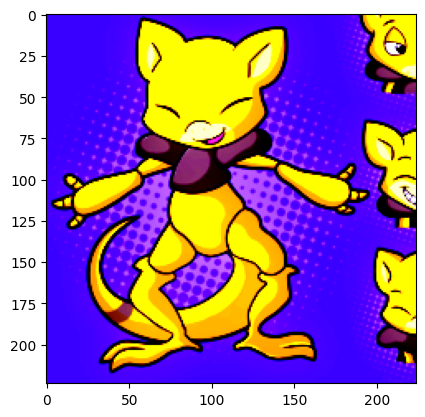

In [14]:
import matplotlib.pyplot as plt
import numpy as np
#plt.imshow(dataset.__getitem__(0)[0].numpy())

img = dataset.__getitem__(1)[0].numpy()
plt.imshow(np.transpose(img, (1, 2, 0)))  # Cambia a (128, 128, 3)

In [25]:
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

if torch.backends.mps.is_available():
        device = torch.device("mps")
elif torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")
train_size = int(0.7 * len(dataset))
val_size = int(0.15 * len(dataset))
test_size = int(0.15 * len(dataset))
train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, val_size, test_size])

train_loader = DataLoader(train_dataset, batch_size= BATCH_SIZE, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=4)
# Inicializar modelo
num_classes = len(dataset.classes)
model = PokemonResNet(num_classes).to(device)

# Definir función de pérdida y optimizador
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=3, factor=0.5)

# Entrenar el modelo
model = train_resnet(
    model=model,
    train_loader=train_loader,
    val_loader=val_loader,
    criterion=criterion,
    optimizer=optimizer,
    scheduler=scheduler,
    num_epochs=NUM_EPOCHS,
    device=device
)




Iniciando entrenamiento ResNet...
Tamaño del batch: 32
Número de batches por época: 150


Training:   0%|          | 0/150 [00:00<?, ?it/s]Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/spawn.py", line 122, in spawn_main
    exitcode = _main(fd, parent_sentinel)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/spawn.py", line 132, in _main
    self = reduction.pickle.load(from_parent)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ModuleNotFoundError: No module named 'config'
Training:   0%|          | 0/150 [00:09<?, ?it/s]


KeyboardInterrupt: 